# Calculus and Algebra problems

## Calculus

Calculus is not obscure. It is the language for modeling behaviors. Calculus enables us to find the rate of changes in order to optimize a function. Without calculus, we would not be able to fully understand techniques such as:

Backpropagation in neural networks

Regression using optimal least square

Expectation maximization in fitting probability models

### Exercise 1

Let's say, in my office, it takes me 10 seconds (time) to travel 25 meters (distance) to the coffee machine.
If we want to express the above situation as a function, then it would be:

distance = speed * time

So for this case, speed is the first derivative of the distance function above. As speed describes the rate of change of distance over time, when people say taking the first derivative of a certain function, they mean finding out the rate of change of a function.

**Find the speed and build the linear function on distance $(d)$ over time $(t)$, when $(t ∈ [0,10])$.**

In [32]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define the distance function
def f(x): return 2.5*x # Function
x = np.linspace(0,10) # Domain


# Plot the distance function on domain (t)

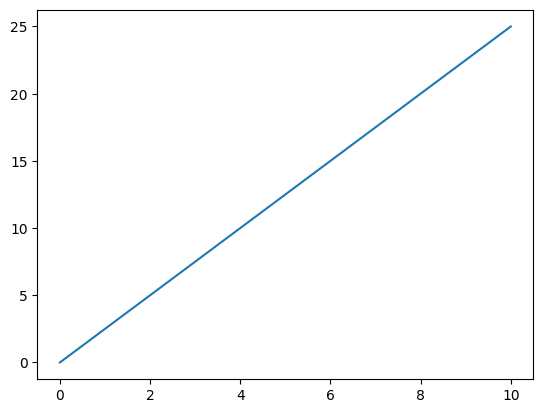

In [33]:
# Plot the distance function on domain (t)
plt.plot(x, f(x))

In [34]:
# Create a DataFrame
f1 = pd.DataFrame({'x': x, 'f(x)': f(x)})
f1.head()

,x,f(x)
0,0.000000,0.000000
1,0.204082,0.510204
2,0.408163,1.020408
3,0.612245,1.530612
4,0.816327,2.040816


### Exercise 2

It turned out that I wasn't walking a constant speed towards getting my coffee, but I was accelerating (my speed increased over time). If my initial *speed = 0*, it still took me 10 seconds to travel from my seat to my coffee, but I was walking faster and faster.

$V_o$ = initial speed = $0$

t = time

a = acceleration

**distance** = $V_o * t + 0.5 * a * (t^2)$

**speed** = $V_o + a * t$

The first derivative of the speed function is acceleration. I realize that the speed function is closely related to the distance function.

**Find the acceleration value and build the quadratic function  $(t ∈ [0,10])$. Also, create a graph and a table.**

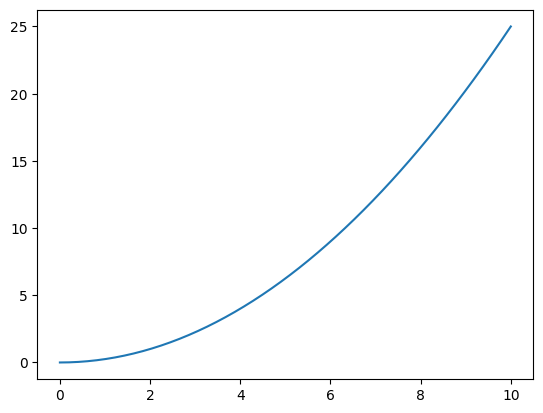

In [35]:
# Define and plot the quadratic funtion

import numpy as np
import matplotlib.pyplot as plt

# Define and plot the quadratic funtion
def f(x): return 1/2*0.5*(x**2)
x = np.linspace(0,10)
plt.plot(x, f(x))


In [36]:
# Create a DataFrame
f2 = pd.DataFrame({'x': x, 'f(x)': f(x)})
f2.head()

,x,f(x)
0,0.000000,0.000000
1,0.204082,0.010412
2,0.408163,0.041649
3,0.612245,0.093711
4,0.816327,0.166597


Before exercise 3, we'll make a brief introduction to Gradient Descent algorithm, which will have a larger explanation in future modules of the bootcamp.

Gradient Descent algorithm is the hero behind the family of deep learning algorithms. When an algorithm in this family runs, it tries to minimize the error between the training input and predicted output. This minimization is done by optimization algorithms, and gradient descent is the most popular one.

Let's say you have these input & output pairs:

```py
# Input:
[
 [1,2],
 [3,4]
]

# Output:
[
 [50],
 [110]
]
```

We can estimate that if we multiply the input values by [10, 20], we can have the output as shown above.

```py
1(10) + 2(20) = 50

3(10) + 4(20) = 110
```

When a machine learning algorithm starts running, it assigns random values and makes a prediction. 
Let's say it assigned [1,2] values:

```py
1(1) + 2(2) = 5

3(1) + 4(2) = 11
```

Once it has the predictions, it calculates the error: the difference between the real data and the predicted data. There are many ways to calculate the error, and they are called loss functions.

Once we have this value, the optimization algorithm starts showing itself, and it sets new values which replace the initial random values. 

And, the loop continues until a condition is met. That condition can be to loop *n* times, or to loop until the error is smaller than a value.

It can be hard to understand **gradient descent** without understanding **gradient**. So, let's focus on what a gradient is. The gradient shows the direction of the greatest change of a scalar function. The gradient calculation is done with derivatives, so let's start with a simple example. To calculate the gradient, we just need to remember some linear algebra calculations from high school because we need to calculate derivatives.

Let's say we want to find the minimum point of $f(x) = x^2$. The derivative of that function is $df(x)=2x$. 

The gradient of $f(x)$ at point $x=-10$

is 

$df(-10)=-20$.

The gradient of $f(x)$ at point $x=1$

is 

$df(1)=2$.

Now let’s visualize $f(x)$ and those $x=-10$ and $x=1$ points.

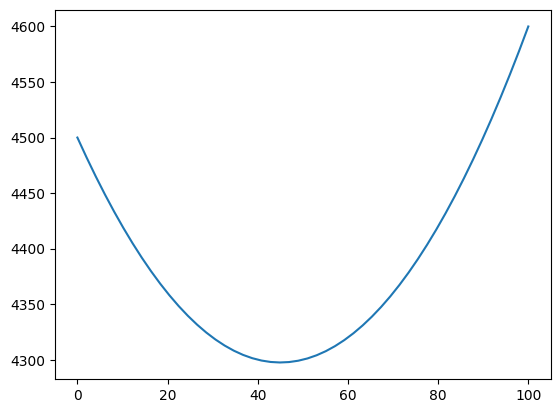

In [37]:
# Define and plot the function
def f(x): return 0.1*(x)**2 -9*x + 4500
x = np.linspace(0,100)
plt.plot(x, f(x))

The red dot at x=-10 does not know the surface it stands on, and it only knows the coordinates of where it stands and the gradient of itself, which is -20. And the other red dot at x=1 does not know the surface it stands on; it only knows the coordinates of where it stands and the gradient of itself, which is 2.

By having only this information: we can say that the red dot at x=-10 should make a bigger jump than x=1 because it has a bigger absolute gradient value. The sign shows the direction. Minus (-) shows that the red dot at x=-10 should move to the right and the other one should move to the left.

In summary, the red dot at x=-10 (gradient: -20) should make a bigger jump to the right, and the red dot at x=1 (gradient: 2) should make a smaller jump to the left. 

We know that the jump length should be proportional to the gradient, but what is that value exactly? We don’t know. So, let’s just say that red points should move with the length of *alpha * gradient*, where alpha is just a parameter.

We can say that the new location of the red dot should be calculated with the following formula:

x = x - gradient * alpha

Now let's implement this with **NumPy**. Let's start with visualizing the $f(x)=x^2$ function and the $x=-10$ point.

In [38]:
import numpy as np
 
 
# Creating first matrix
A = np.array([[1, 2], [3, 4]])
 
# Creating second matrix
B = np.array([[4, 5], [6, 7]])

# Print elements
print("Printing elements of first matrix")
print(A)
print("Printing elements of second matrix")
print(B)
 
# Adding both matrices
print("Addition of two matrices")
print(np.add(A, B))

Printing elements of first matrix
[[1 2]
 [3 4]]
Printing elements of second matrix
[[4 5]
 [6 7]]
Addition of two matrices
[[ 5  7]
 [ 9 11]]


The following code implements the whole logic explained before:

In [42]:
def df(x):
    # Ejemplo de derivada: df(x) = 2*x (derivada de f(x) = x^2)
    return 2 * x

def gradient_descent(x, nsteps=1):
    # collectXs es una lista para almacenar cómo cambió x en cada iteración, para poder visualizarlo después
    collectXs = [x]
    
    # learning_rate es el valor que mencionamos como alfa en la sección anterior
    learning_rate = 0.1
    
    for _ in range(nsteps):
        # La siguiente línea hace la magia
        # El siguiente valor de x se calcula restando el gradiente * learning_rate a sí mismo
        # La intuición detrás de esta línea está en la sección anterior
        x -= df(x) * learning_rate 
        collectXs.append(x)
        
    # Devolvemos una tupla que contiene
    # x -> x reciente después de nsteps 
    # collectXs -> todos los valores de x que se calcularon hasta ahora
    return x, collectXs

Before running a gradient descent with 1000 steps, let's just run it twice, one step at a time, to see how x evolves. 
We start with x=-10, and it evolves to x=-8. We know that when x=0 that is the **minimum point**, so yes, it is evolving in the correct direction.

In [43]:
x = -10
x, collectedXs = gradient_descent(x, nsteps=1)
print(x)
print(collectedXs)

x, collectedXs = gradient_descent(x, nsteps=1)
print(x)
print(collectedXs)


-8.0
[-10, -8.0]
-6.4
[-8.0, -6.4]


In [ ]:
# The next step will start at x=-8. Let's run a gradient for 1 step

x, collectedXs = gradient_descent(x, nsteps=1)
print(x)

-6.4


It goes to x=-6.4. Excellent. Now let's run it 1000 times

In [ ]:
x, collectedXs = gradient_descent(x, nsteps=1000)
print(x)

-7.873484301831169e-97


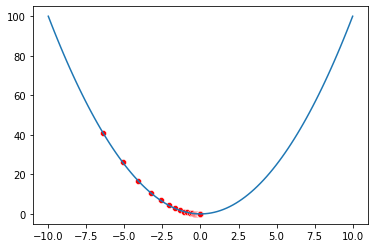

In [ ]:
visualize(f, x=collectedXs)

### Exercise 3

When I arrive to the coffee machine, I hear my colleague talking about the per-unit costs of producing 'product B' for the company. As the company produces more units, the per-unit costs continue to decrease until a point where they start to increase.

To optimize the per-unit production cost at its minimum to optimize efficiency, the company would need to find the number of units to be produced where the per-unit production costs begin to change from decreasing to increasing.

**Build a quadratic function $f(x)=0.1(x)^2−9x +4500$ on $x∈[0,100]$ to create the per-unit cost function, and make a conclusion.**

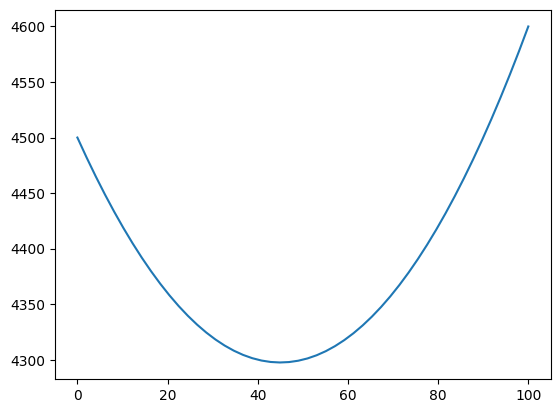

In [ ]:
# Define and plot the function
def f(x): return 0.1*(x)**2 -9*x + 4500
x = np.linspace(0,100)
plt.plot(x, f(x))

We saw with Gradient Descent how the red dot navigates in an environment it does not know about. It only knows the coordinates of where it is and its gradient. The red dot could find the minimum point by using only this knowledge and the gradient descent algorithm.

**Optional:**

Implement all the previous steps to create a gradient descent algorithm to see how the per-unit cost evolves, with a starting point of 0 units of production.

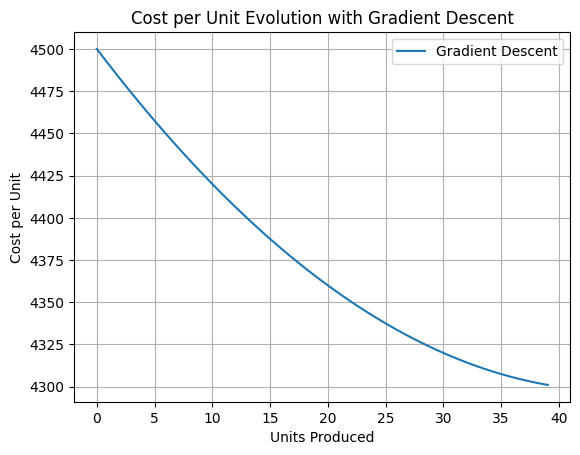

   Units Produced  Cost per Unit
0        0.000000    4500.000000
1        0.900000    4491.981000
2        1.782000    4484.279552
3        2.646360    4476.883082
4        3.493433    4469.779512
5        4.323564    4462.957243
6        5.137093    4456.405137
7        5.934351    4450.112493
8        6.715664    4444.069038
9        7.481351    4438.264904
The minimum cost per unit is achieved when producing approximately 39.03 units, with a cost of 4301.06 per unit.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Definir la función de costo por unidad
def cost_per_unit(x):
    return 0.1 * x**2 - 9 * x + 4500

# Definir la derivada de la función de costo por unidad
def cost_per_unit_derivative(x):
    return 0.2 * x - 9

# Implementar el algoritmo de descenso de gradiente
def gradient_descent(starting_point, learning_rate, iterations):
    x = starting_point
    x_values = [x]
    cost_values = [cost_per_unit(x)]
    
    for _ in range(iterations):
        gradient = cost_per_unit_derivative(x)
        x = x - learning_rate * gradient
        x_values.append(x)
        cost_values.append(cost_per_unit(x))
    
    return x_values, cost_values

# Parámetros del algoritmo de descenso de gradiente
starting_point = 0
learning_rate = 0.1
iterations = 100

# Ejecutar el algoritmo de descenso de gradiente
x_values, cost_values = gradient_descent(starting_point, learning_rate, iterations)

# Graficar la evolución del costo por unidad
plt.plot(x_values, cost_values, label='Gradient Descent')
plt.xlabel('Units Produced')
plt.ylabel('Cost per Unit')
plt.title('Cost per Unit Evolution with Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()

# Crear un DataFrame
data = {
    'Units Produced': x_values,
    'Cost per Unit': cost_values
}
df = pd.DataFrame(data)

# Mostrar las primeras 10 filas del DataFrame
print(df.head(10))

# Conclusión
optimal_units = x_values[-1]
optimal_cost = cost_per_unit(optimal_units)
print(f"The minimum cost per unit is achieved when producing approximately {optimal_units:.2f} units, with a cost of {optimal_cost:.2f} per unit.")


## Linear Algebra

### Exercise 1: Sum of two matrices

Suppose we have two matrices A and B.

```py
A = [[1,2],[3,4]]
B = [[4,5],[6,7]]

then we get
A+B = [[5,7],[9,11]]
A-B = [[-3,-3],[-3,-3]]
```

Make the sum of two matrices using Python with NumPy

In [ ]:
import numpy as np
 
 
# Creating first matrix
A = np.array([[1, 2], [3, 4]])
 
# Creating second matrix
B = np.array([[4, 5], [6, 7]])

# Print elements
print("Printing elements of first matrix")
print(A)
print("Printing elements of second matrix")
print(B)
 
# Adding both matrices
print("Addition of two matrices")
print(np.add(A, B))


Printing elements of first matrix
[[1 2]
 [3 4]]
Printing elements of second matrix
[[4 5]
 [6 7]]
Addition of two matrices
[[ 5  7]
 [ 9 11]]


### Exercise 2: Sum of two lists

There will be many situations in which we'll have to find an index-wise summation of two different lists. This can have possible applications in day-to-day programming. In this exercise, we will solve the same problem in various ways in which this task can be performed.

We have the following two lists:

```py
list1 = [2, 5, 4, 7, 3]
list2 = [1, 4, 6, 9, 10]
```

Now let's use Python code to demonstrate addition of two lists.

In [ ]:
# Naive method

# Initializing lists
list1 = [2, 5, 4, 7, 3]
list2 = [1, 4, 6, 9, 10]
 
# Printing original lists
print ("Original list 1 : " + str(list1))
print ("Original list 2 : " + str(list2))
 
# Using naive method to add two lists 
res_list = []
for i in range(0, len(list1)):
    res_list.append(list1[i] + list2[i])
 
# Printing resulting list 
print ("Resulting list is : " + str(res_list))

Original list 1 : [2, 5, 4, 7, 3]
Original list 2 : [1, 4, 6, 9, 10]
Resulting list is : [3, 9, 10, 16, 13]


In [ ]:
# Use list comprehension to perform addition of the two lists:

# Initializing lists
list1 = [1, 3, 4, 6, 8]
list2 = [4, 5, 6, 2, 10]
 
# Printing original lists
print ("Original list 1 : " + str(list1))
print ("Original list 2 : " + str(list2))
 
# Using list comprehension to add two lists
res_list = [list1[i] + list2[i] for i in range(len(list1))]
 
# Printing resulting list 
print ("Resulting list is : " + str(res_list))


Original list 1 : [1, 3, 4, 6, 8]
Original list 2 : [4, 5, 6, 2, 10]
Resulting list is : [5, 8, 10, 8, 18]


In [ ]:
# Use map() + add():

from operator import add
 
# Initializing lists
list1 = [1, 3, 4, 6, 8]
list2 = [4, 5, 6, 2, 10]
 
# Printing original lists
print ("Original list 1 : " + str(list1))
print ("Original list 2 : " + str(list2))
 
# Using map() + add() to add two lists
res_list = list(map(add, list1, list2))
 
# Printing resulting list  
print ("Resulting list is : " + str(res_list))

Original list 1 : [1, 3, 4, 6, 8]
Original list 2 : [4, 5, 6, 2, 10]
Resulting list is : [5, 8, 10, 8, 18]


In [ ]:
# Use zip() + sum():

from operator import add
 
# Initializing lists
list1 = [1, 3, 4, 6, 8]
list2 = [4, 5, 6, 2, 10]
 
# Printing original lists
print ("Original list 1 : " + str(list1))
print ("Original list 2 : " + str(list2))
 
# Using zip() + sum() to add two lists
res_list = [sum(i) for i in zip(list1, list2)]
 
# Printing resulting list  
print ("Resulting list is : " + str(res_list))


Original list 1 : [1, 3, 4, 6, 8]
Original list 2 : [4, 5, 6, 2, 10]
Resulting list is : [5, 8, 10, 8, 18]


Now use the following three different methods to make the same calculation: sum of two lists

In [47]:
# Use list comprehension to perform addition of the two lists:


# Initializing lists
list1 = [1, 3, 4, 6, 8]
list2 = [4, 5, 6, 2, 10]
 
# Printing original lists
print("Original list 1 : " + str(list1))
print("Original list 2 : " + str(list2))
 
# Using list comprehension to add two lists
res_list = [list1[i] + list2[i] for i in range(len(list1))]
 
# Printing resulting list  
print("Resulting list is : " + str(res_list))



Original list 1 : [1, 3, 4, 6, 8]
Original list 2 : [4, 5, 6, 2, 10]
Resulting list is : [5, 8, 10, 8, 18]


In [48]:
# Use zip() + sum():


# Initializing lists
list1 = [1, 3, 4, 6, 8]
list2 = [4, 5, 6, 2, 10]
 
# Printing original lists
print("Original list 1 : " + str(list1))
print("Original list 2 : " + str(list2))
 
# Using zip() + sum() to add two lists
res_list = [sum(i) for i in zip(list1, list2)]
 
# Printing resulting list  
print("Resulting list is : " + str(res_list))




Original list 1 : [1, 3, 4, 6, 8]
Original list 2 : [4, 5, 6, 2, 10]
Resulting list is : [5, 8, 10, 8, 18]


In [ ]:
# Define the lists
list1 = [2, 5, 4, 7, 3]
list2 = [1, 4, 6, 9, 10]

# Method 1: Using a list comprehension
result_method1 = [list1[i] + list2[i] for i in range(len(list1))]

# Print the result
print("Method 1 - Using list comprehension:", result_method1)


Method 1 - Using list comprehension: [3, 9, 10, 16, 13]


In [ ]:
# Method 2: Using zip()
result_method2 = [x + y for x, y in zip(list1, list2)]

# Print the result
print("Method 2 - Using zip():", result_method2)


Method 2 - Using zip(): [3, 9, 10, 16, 13]


In [ ]:
import numpy as np

# Method 3: Using NumPy
arr1 = np.array(list1)
arr2 = np.array(list2)
result_method3 = arr1 + arr2

# Print the result
print("Method 3 - Using NumPy:", result_method3.tolist())  # Convert NumPy array back to list for printing


Method 3 - Using NumPy: [3, 9, 10, 16, 13]


### Exercise 3: Dot multiplication

We have two matrices:

```py
matrix1 = [[1,7,3],
 [4,5,2],
 [3,6,1]]
matrix2 = [[5,4,1],
 [1,2,3],
 [4,5,2]]
```

A simple technique but expensive method for larger input datasets is using *for loops*. In this exercise, we will first use nested *for loops* to iterate through each row and column of the matrices, and then we will perform the same multiplication using NumPy.

In [ ]:
# Using a for loop input two matrices of size n x m
matrix1 = [[1,7,3],
 [4,5,2],
 [3,6,1]]
matrix2 = [[5,4,1],
 [1,2,3],
 [4,5,2]]
 
res = [[0 for x in range(3)] for y in range(3)]
 
# Explicit for loops
for i in range(len(matrix1)):
    for j in range(len(matrix2[0])):
        for k in range(len(matrix2)):
 
            # Resulting matrix
            res[i][j] += matrix1[i][k] * matrix2[k][j]
 
print(res)

[[24, 33, 28], [33, 36, 23], [25, 29, 23]]


In [ ]:
# Import libraries
import numpy as np
 
# Input two matrices
mat1 = ([1,7,3],[ 4,5,2],[ 3,6,1])
mat2 = ([5,4,1],[ 1,2,3],[ 4,5,2])
 
# This will return dot product
res = np.dot(mat1,mat2)
 
# Print resulting matrix
print(res)

[[24 33 28]
 [33 36 23]
 [25 29 23]]


In [ ]:
# Define the matrices
matrix1 = [[1, 7, 3],
           [4, 5, 2],
           [3, 6, 1]]

matrix2 = [[5, 4, 1],
           [1, 2, 3],
           [4, 5, 2]]

# Initialize the result matrix with zeros
result_matrix1 = [[0, 0, 0],
                  [0, 0, 0],
                  [0, 0, 0]]

# Perform matrix multiplication using nested loops
for i in range(len(matrix1)):
    for j in range(len(matrix2[0])):
        for k in range(len(matrix2)):
            result_matrix1[i][j] += matrix1[i][k] * matrix2[k][j]

# Print the result
print("Matrix multiplication using nested loops:")
for row in result_matrix1:
    print(row)


Matrix multiplication using nested loops:
[24, 33, 28]
[33, 36, 23]
[25, 29, 23]


In [ ]:
import numpy as np

# Convert lists to NumPy arrays
arr1 = np.array(matrix1)
arr2 = np.array(matrix2)

# Perform matrix multiplication using NumPy
result_matrix2 = np.dot(arr1, arr2)

# Print the result
print("\nMatrix multiplication using NumPy:")
print(result_matrix2)



Matrix multiplication using NumPy:
[[24 33 28]
 [33 36 23]
 [25 29 23]]


Source:

https://www.youtube.com/channel/UCXq-PLvYAX-EufF5RAPihVg

https://www.geeksforgeeks.org/

https://medium.com/@seehleung/basic-calculus-explained-for-machine-learning-c7f642e7ced3

https://blog.demir.io/understanding-gradient-descent-266fc3dcf02f